In [1]:
#Install missing libraries
!pip install folium

In [2]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium

In [3]:
#Read Data and load as df_cd
df_cd = pd.read_csv('/kaggle/input/crime-data-analysis/Crime_Data_from_2020_to_Present.csv')

In [4]:
# Print all column names
df_cd.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
# Describe the Data
df_cd.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.553390e+05,955339.000000,955339.000000,955339.000000,955339.000000,955339.000000,955339.000000,955327.000000,325019.000000,955328.000000,68466.000000,2294.000000,64.00000,955339.000000,955339.000000
mean,2.191355e+08,1338.453032,10.718033,1118.243545,1.407805,500.667710,29.383110,306.255200,363.741547,500.415756,958.107265,984.102005,991.21875,33.993372,-118.074280
std,1.261589e+07,652.186527,6.100431,610.098189,0.491427,206.867837,21.909695,217.844195,123.606085,206.661318,110.316767,51.662269,27.06985,1.660523,5.755746
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.105125e+08,900.000000,6.000000,621.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.430700
50%,2.207106e+08,1420.000000,11.000000,1142.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.059000,-118.322500
75%,2.307171e+08,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.274000
max,2.499187e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [6]:
# Check data types of columns
df_cd.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [7]:
df_cd.info

<bound method DataFrame.info of             DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0       190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130   
1       200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800   
2       200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700   
3       200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037   
4       220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200   
...           ...                     ...                     ...       ...   
955334  241604405  01/14/2024 12:00:00 AM  01/13/2024 12:00:00 AM       720   
955335  242106032  02/20/2024 12:00:00 AM  02/17/2024 12:00:00 AM      2330   
955336  242004546  01/16/2024 12:00:00 AM  01/16/2024 12:00:00 AM      1510   
955337  240104953  01/15/2024 12:00:00 AM  01/15/2024 12:00:00 AM       100   
955338  240309674  04/24/2024 12:00:00 AM  04/24/2024 12:00:00 AM      1500   

        AREA  AREA 

In [8]:
# Check for missing values
df_cd.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           136675
Vict Age               0
Vict Sex          130045
Vict Descent      130055
Premis Cd             12
Premis Desc          569
Weapon Used Cd    630320
Weapon Desc       630320
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          886873
Crm Cd 3          953045
Crm Cd 4          955275
LOCATION               0
Cross Street      806439
LAT                    0
LON                    0
dtype: int64

In [9]:
# Check for missing values in the dataset
missing_values = df_cd.isnull().sum()

# Filter out columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display the columns with missing values and their count
if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Columns with missing values:\n", missing_columns)

Columns with missing values:
 Mocodes           136675
Vict Sex          130045
Vict Descent      130055
Premis Cd             12
Premis Desc          569
Weapon Used Cd    630320
Weapon Desc       630320
Status                 1
Crm Cd 1              11
Crm Cd 2          886873
Crm Cd 3          953045
Crm Cd 4          955275
Cross Street      806439
dtype: int64


In [10]:
# Convert date & time columns to datetime
df_cd['Date Rptd'] = pd.to_datetime(df_cd['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df_cd['DATE OCC'] = pd.to_datetime(df_cd['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df_cd['TIME OCC'] = df_cd['TIME OCC'].astype(str).str.zfill(4)

In [11]:
# Verify changes
df_cd.info()
df_cd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955339 entries, 0 to 955338
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           955339 non-null  int64         
 1   Date Rptd       955339 non-null  datetime64[ns]
 2   DATE OCC        955339 non-null  datetime64[ns]
 3   TIME OCC        955339 non-null  object        
 4   AREA            955339 non-null  int64         
 5   AREA NAME       955339 non-null  object        
 6   Rpt Dist No     955339 non-null  int64         
 7   Part 1-2        955339 non-null  int64         
 8   Crm Cd          955339 non-null  int64         
 9   Crm Cd Desc     955339 non-null  object        
 10  Mocodes         818664 non-null  object        
 11  Vict Age        955339 non-null  int64         
 12  Vict Sex        825294 non-null  object        
 13  Vict Descent    825284 non-null  object        
 14  Premis Cd       955327 non-null  flo

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [12]:
# Fill missing values
df_cd['Vict Sex'].fillna('Unknown', inplace=True)
df_cd['Vict Descent'].fillna('Unknown', inplace=True)
df_cd['Premis Cd'].fillna(df_cd['Premis Cd'].mode()[0], inplace=True)
df_cd['Premis Desc'].fillna('Unknown', inplace=True)
df_cd['Crm Cd 1'].fillna(df_cd['Crm Cd 1'].mode()[0], inplace=True)
df_cd['Weapon Used Cd'].fillna('Unknown', inplace=True)
df_cd['Weapon Desc'].fillna('Unknown', inplace=True)

# Drop columns with too many missing values
df_cd.drop(columns=['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], inplace=True)

# Drop the columns which have may not be relavant as there are other data available
df_cd.drop(columns=['Mocodes'], inplace=True)

# Verify changes
df_cd.info()

/tmp/ipykernel_17/2851833917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cd['Vict Sex'].fillna('Unknown', inplace=True)
/tmp/ipykernel_17/2851833917.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955339 entries, 0 to 955338
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           955339 non-null  int64         
 1   Date Rptd       955339 non-null  datetime64[ns]
 2   DATE OCC        955339 non-null  datetime64[ns]
 3   TIME OCC        955339 non-null  object        
 4   AREA            955339 non-null  int64         
 5   AREA NAME       955339 non-null  object        
 6   Rpt Dist No     955339 non-null  int64         
 7   Part 1-2        955339 non-null  int64         
 8   Crm Cd          955339 non-null  int64         
 9   Crm Cd Desc     955339 non-null  object        
 10  Vict Age        955339 non-null  int64         
 11  Vict Sex        955339 non-null  object        
 12  Vict Descent    955339 non-null  object        
 13  Premis Cd       955339 non-null  float64       
 14  Premis Desc     955339 non-null  obj

In [13]:
# Describe the Data
df_cd.describe()

,DR_NO,Date Rptd,DATE OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,9.553390e+05,955339,955339,955339.000000,955339.000000,955339.000000,955339.000000,955339.000000,955339.000000,955339.000000,955339.000000,955339.000000
mean,2.191355e+08,2022-04-11 17:54:26.347547648,2022-03-31 03:54:28.073426688,10.718033,1118.243545,1.407805,500.667710,29.383110,306.252621,500.415866,33.993372,-118.074280
min,8.170000e+02,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.105125e+08,2021-03-28 00:00:00,2021-03-14 00:00:00,6.000000,621.000000,1.000000,331.000000,0.000000,101.000000,331.000000,34.014500,-118.430700
50%,2.207106e+08,2022-05-02 00:00:00,2022-04-18 00:00:00,11.000000,1142.000000,1.000000,442.000000,30.000000,203.000000,442.000000,34.059000,-118.322500
75%,2.307171e+08,2023-05-05 00:00:00,2023-04-23 00:00:00,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.164900,-118.274000
max,2.499187e+08,2024-06-24 00:00:00,2024-06-24 00:00:00,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000
std,1.261589e+07,NaN,NaN,6.100431,610.098189,0.491427,206.867837,21.909695,217.844041,206.660131,1.660523,5.755746


In [14]:
# Check for missing values in the dataset
missing_values = df_cd.isnull().sum()

# Filter out columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Display the columns with missing values and their count
if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Columns with missing values:\n", missing_columns)

Columns with missing values:
 Status    1
dtype: int64


Class distribution:
AREA
1     64737
12    59719
14    55792
3     54129
6     50035
15    48556
18    48127
20    47840
13    47125
7     45734
2     44440
8     43509
9     40830
11    40661
10    40400
17    39603
5     39485
21    39403
19    38244
4     35156
16    31814
Name: count, dtype: int64


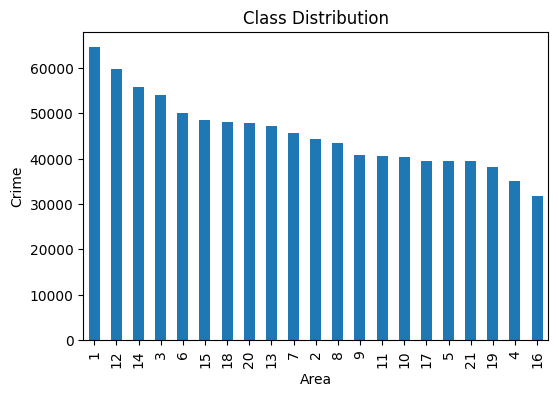

In [15]:
# Check the distribution of the AREA column
class_distribution = df_cd['AREA'].value_counts()

# Display the count of each area
print("Class distribution:")
print(class_distribution)

# Plot the distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Area')
plt.ylabel('Crime')
plt.show()

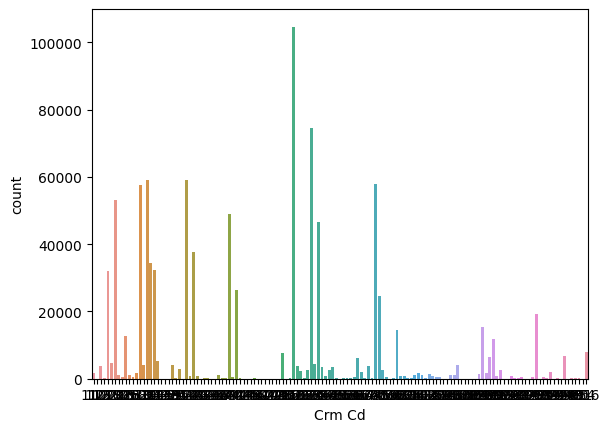

In [16]:
sns.countplot(x='Crm Cd', data=df_cd)
plt.show()

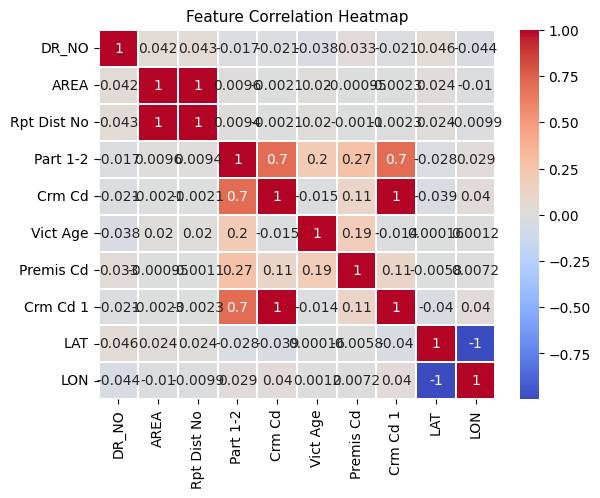

In [17]:
# Correlation heatmap
plt.figure()
sns.heatmap(df_cd.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Feature Correlation Heatmap', fontsize=11)

plt.show()

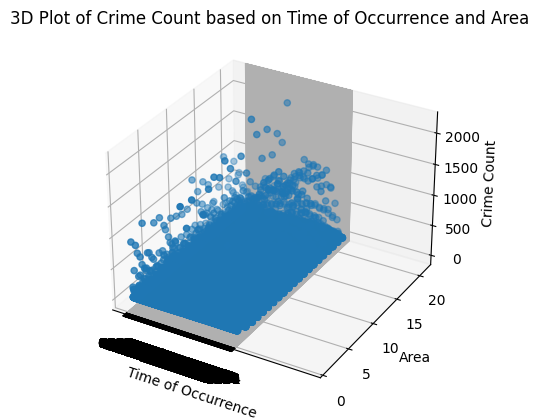

In [18]:
from mpl_toolkits.mplot3d import Axes3D

crime_counts = df_cd.groupby(['AREA', 'TIME OCC']).size().reset_index(name='Crime Count')


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.scatter(crime_counts['TIME OCC'], crime_counts['AREA'], crime_counts['Crime Count'])

# Set labels
ax.set_xlabel('Time of Occurrence')
ax.set_ylabel('Area')
ax.set_zlabel('Crime Count')

# Set title
ax.set_title('3D Plot of Crime Count based on Time of Occurrence and Area')

# Show plot
plt.show()


In [19]:
# Display unique values in the 'AREA NAME' column
unique_area_names = df_cd['AREA NAME'].unique()
print("Unique values in 'AREA NAME' column:")
print(unique_area_names)

Unique values in 'AREA NAME' column:
['Wilshire' 'Central' 'Southwest' 'Van Nuys' 'Hollywood' 'Southeast'
 'Newton' 'Mission' 'Rampart' 'West Valley' 'West LA' 'Olympic'
 'Hollenbeck' 'Topanga' 'Northeast' '77th Street' 'Pacific' 'N Hollywood'
 'Harbor' 'Foothill' 'Devonshire']


In [20]:
# Display unique values in the 'AREA' column
unique_areas = df_cd['AREA'].unique()
print("Unique values in 'AREA' column:")
print(unique_areas)

Unique values in 'AREA' column:
[ 7  1  3  9  6 18 13 19  2 10  8 20  4 21 11 12 14 15  5 16 17]


In [21]:
# Create a DataFrame with the provided AREA and AREA NAME
crime_loc = {
    'AREA': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'AREA NAME': ['Central', 'Rampart', 'Southwest', 'Hollenbeck', 'Harbor', 'Hollywood', 'Wilshire', 'West LA', 'Van Nuys', 'West Valley', 'Northeast', '77th Street', 'Newton', 'Pacific', 'N Hollywood', 'Foothill', 'Devonshire', 'Southeast', 'Mission', 'Olympic', 'Topanga']
}

df_cd = pd.DataFrame(crime_loc)

# Create a dictionary mapping AREA to AREA NAME
area_to_name = df_cd.set_index('AREA')['AREA NAME'].to_dict()

# Display the mapping
print("AREA to AREA NAME mapping:")
for area, name in area_to_name.items():
    print(f"AREA {area}: {name}")

# Verify the DataFrame
print(df_cd)

AREA to AREA NAME mapping:
AREA 1: Central
AREA 2: Rampart
AREA 3: Southwest
AREA 4: Hollenbeck
AREA 5: Harbor
AREA 6: Hollywood
AREA 7: Wilshire
AREA 8: West LA
AREA 9: Van Nuys
AREA 10: West Valley
AREA 11: Northeast
AREA 12: 77th Street
AREA 13: Newton
AREA 14: Pacific
AREA 15: N Hollywood
AREA 16: Foothill
AREA 17: Devonshire
AREA 18: Southeast
AREA 19: Mission
AREA 20: Olympic
AREA 21: Topanga
    AREA    AREA NAME
0      1      Central
1      2      Rampart
2      3    Southwest
3      4   Hollenbeck
4      5       Harbor
5      6    Hollywood
6      7     Wilshire
7      8      West LA
8      9     Van Nuys
9     10  West Valley
10    11    Northeast
11    12  77th Street
12    13       Newton
13    14      Pacific
14    15  N Hollywood
15    16     Foothill
16    17   Devonshire
17    18    Southeast
18    19      Mission
19    20      Olympic
20    21      Topanga


In [22]:
# Create a map centered around a default location (e.g., Los Angeles)
#map_center = [34.0522, -118.2437]  # Coordinates for Los Angeles
#crime_map = folium.Map(location=map_center, zoom_start=10)

# Add markers to the map with AREA and AREA NAME
#for idx, row in df_cd.iterrows():
   # folium.Marker(
   #     location=map_center,  # Using the same center location for all markers
    #    popup=f"AREA: {row['AREA']}<br>AREA NAME: {row['AREA NAME']}",
    #    tooltip=row['AREA NAME']
    #).add_to(crime_map)

# Save the map to an HTML file
#crime_map.save('crime_map.html')

# Display the map in a Jupyter notebook (optional)
#crime_map


In [23]:
# Create a DataFrame with the provided Crm Cd & Crm Cd Desc
crime_type = {
    'Crm Cd': [110, 113, 121, 122, 210, 220, 230, 231, 235, 236, 237, 250, 251, 310, 320, 330, 331, 341, 343, 345, 347, 349, 350, 351, 352, 353, 354, 410, 420, 421, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 450, 451, 452, 470, 471, 473, 474, 475, 480, 485, 487, 510, 520, 522, 622, 623, 624, 625, 626, 627, 647, 648, 649, 651, 652, 653, 654, 660, 661, 662, 664, 666, 668, 670, 740, 745, 753, 755, 756, 760, 761, 762, 763, 805, 806, 810, 812, 813, 814, 815, 820, 821, 822, 830, 840, 845, 850, 860, 865, 870, 880, 882, 884, 886, 888, 890, 900, 901, 902, 903, 904, 906, 910, 920, 921, 922, 924, 926, 928, 930, 931, 932, 933, 940, 942, 943, 944, 946, 948, 949, 950, 951, 954, 956],
    'Crm Cd Desc': ['CRIMINAL HOMICIDE', 'MANSLAUGHTER NEGLIGENT', 'RAPE FORCIBLE', 'RAPE ATTEMPTED', 'ROBBERY', 'ATTEMPTED ROBBERY', 'ASSAULT WITH DEADLY WEAPON AGGRAVATED ASSAULT', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'CHILD ABUSE PHYSICAL AGGRAVATED ASSAULT', 'INTIMATE PARTNER AGGRAVATED ASSAULT', 'CHILD NEGLECT SEE 300 W.I.C.', 'SHOTS FIRED AT MOVING VEHICLE TRAIN OR AIRCRAFT', 'SHOTS FIRED AT INHABITED DWELLING', 'BURGLARY', 'BURGLARY ATTEMPTED', 'BURGLARY FROM VEHICLE', 'THEFT FROM MOTOR VEHICLE GRAND $950.01 AND OVER', 'THEFT GRAND $950.01 & OVER EXCPT GUNS FOWL LIVESTK PROD', 'SHOPLIFTING GRAND THEFT $950.01 & OVER', 'DISHONEST EMPLOYEE GRAND THEFT', 'GRAND THEFT / INSURANCE FRAUD', 'GRAND THEFT / AUTO REPAIR', 'THEFT PERSON', 'PURSE SNATCHING', 'PICKPOCKET', 'DRUNK ROLL', 'THEFT OF IDENTITY', 'BURGLARY FROM VEHICLE ATTEMPTED', 'THEFT FROM MOTOR VEHICLE PETTY $950 & UNDER', 'THEFT FROM MOTOR VEHICLE ATTEMPT', 'BLOCKING DOOR INDUCTION CENTER', 'DRIVING WITHOUT OWNER CONSENT DWOC', 'FALSE IMPRISONMENT', 'LYNCHING', 'LYNCHING ATTEMPTED', 'RESISTING ARREST', 'RECKLESS DRIVING', 'FALSE POLICE REPORT', 'THEFT PLAIN PETTY $950 & UNDER', 'THEFT PLAIN ATTEMPT', 'SHOPLIFTING PETTY THEFT $950 & UNDER', 'SHOPLIFTING ATTEMPT', 'DISHONEST EMPLOYEE PETTY THEFT', 'DISHONEST EMPLOYEE ATTEMPTED THEFT', 'PETTY THEFT AUTO REPAIR', 'THEFT FROM PERSON ATTEMPT', 'PURSE SNATCHING ATTEMPT', 'PICKPOCKET ATTEMPT', 'TILL TAP GRAND THEFT $950.01 & OVER', 'TILL TAP PETTY $950 & UNDER', 'THEFT COIN MACHINE GRAND $950.01 & OVER', 'THEFT COIN MACHINE PETTY $950 & UNDER', 'THEFT COIN MACHINE ATTEMPT', 'BIKE STOLEN', 'BIKE ATTEMPTED STOLEN', 'BOAT STOLEN', 'VEHICLE STOLEN', 'VEHICLE ATTEMPT STOLEN', 'VEHICLE STOLEN OTHER MOTORIZED SCOOTERS BIKES ETC', 'BATTERY ON A FIREFIGHTER', 'BATTERY POLICE SIMPLE', 'BATTERY SIMPLE ASSAULT', 'OTHER ASSAULT', 'INTIMATE PARTNER SIMPLE ASSAULT', 'CHILD ABUSE PHYSICAL SIMPLE ASSAULT', 'THROWING OBJECT AT MOVING VEHICLE', 'ARSON', 'DOCUMENT FORGERY / STOLEN FELONY', 'DOCUMENT WORTHLESS $200.01 & OVER', 'DOCUMENT WORTHLESS $200 & UNDER', 'CREDIT CARDS FRAUD USE $950.01 & OVER', 'CREDIT CARDS FRAUD USE $950 & UNDER', 'COUNTERFEIT', 'UNAUTHORIZED COMPUTER ACCESS', 'BUNCO GRAND THEFT', 'BUNCO PETTY THEFT', 'BUNCO ATTEMPT', 'EMBEZZLEMENT GRAND THEFT $950.01 & OVER', 'EMBEZZLEMENT PETTY THEFT $950 & UNDER', 'VANDALISM FELONY $400 & OVER ALL CHURCH VANDALISMS', 'VANDALISM MISDEAMEANOR $399 OR UNDER', 'DISCHARGE FIREARMS/SHOTS FIRED', 'BOMB SCARE', 'WEAPONS POSSESSION/BOMBING', 'LEWD/LASCIVIOUS ACTS WITH CHILD', 'BRANDISH WEAPON', 'LEWD CONDUCT', 'STALKING', 'PIMPING', 'PANDERING', 'SEX UNLAWFUL INC MUTUAL CONSENT PENETRATION W/ FRGN OBJ', 'CRM AGNST CHLD 13 OR UNDER 14 15 & SUSP 10 YRS OLDER', 'CHILD ANNOYING 17YRS & UNDER', 'CHILD PORNOGRAPHY', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'ORAL COPULATION', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 'HUMAN TRAFFICKING COMMERCIAL SEX ACTS', 'INCEST SEXUAL ACTS BETWEEN BLOOD RELATIVES', 'BEASTIALITY CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM', 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'INDECENT EXPOSURE', 'BATTERY WITH SEXUAL CONTACT', 'DRUGS TO A MINOR', 'CHILD ABANDONMENT', 'DISRUPT SCHOOL', 'INCITING A RIOT', 'FAILURE TO DISPERSE', 'DISTURBING THE PEACE', 'TRESPASSING', 'FAILURE TO YIELD', 'VIOLATION OF COURT ORDER', 'VIOLATION OF RESTRAINING ORDER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'CONTEMPT OF COURT', 'FIREARMS EMERGENCY PROTECTIVE ORDER FIREARMS EPO', 'FIREARMS RESTRAINING ORDER FIREARMS RO', 'KIDNAPPING', 'KIDNAPPING GRAND ATTEMPT', 'HUMAN TRAFFICKING INVOLUNTARY SERVITUDE', 'CHILD STEALING', 'TELEPHONE PROPERTY DAMAGE', 'TRAIN WRECKING', 'THREATENING PHONE CALLS/LETTERS', 'CRIMINAL THREATS NO WEAPON DISPLAYED', 'REPLICA FIREARMS SALE DISPLAY MANUFACTURE OR DISTRIBUTE', 'PEEPING TOM', 'PROWLER', 'EXTORTION', 'BRIBERY', 'CRUELTY TO ANIMALS', 'CONSPIRACY', 'OTHER MISCELLANEOUS CRIME', 'BIGAMY', 'ILLEGAL DUMPING', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES OVER $950.01', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES $950 & UNDER', 'CONTRIBUTING', 'LETTERS LEWD TELEPHONE CALLS LEWD']
}

df_ctd = pd.DataFrame(crime_type)

# Create a dictionary mapping Crime to Crime Description
crime_to_name = df_ctd.set_index('Crm Cd')['Crm Cd Desc'].to_dict()

# Display the mapping
print("Crime to Crime Description:")
for crime, name in crime_to_name.items():
    print(f"CRIME {crime}: {name}")

# Verify the DataFrame
print(df_ctd)

Crime to Crime Description:
CRIME 110: CRIMINAL HOMICIDE
CRIME 113: MANSLAUGHTER NEGLIGENT
CRIME 121: RAPE FORCIBLE
CRIME 122: RAPE ATTEMPTED
CRIME 210: ROBBERY
CRIME 220: ATTEMPTED ROBBERY
CRIME 230: ASSAULT WITH DEADLY WEAPON AGGRAVATED ASSAULT
CRIME 231: ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER
CRIME 235: CHILD ABUSE PHYSICAL AGGRAVATED ASSAULT
CRIME 236: INTIMATE PARTNER AGGRAVATED ASSAULT
CRIME 237: CHILD NEGLECT SEE 300 W.I.C.
CRIME 250: SHOTS FIRED AT MOVING VEHICLE TRAIN OR AIRCRAFT
CRIME 251: SHOTS FIRED AT INHABITED DWELLING
CRIME 310: BURGLARY
CRIME 320: BURGLARY ATTEMPTED
CRIME 330: BURGLARY FROM VEHICLE
CRIME 331: THEFT FROM MOTOR VEHICLE GRAND $950.01 AND OVER
CRIME 341: THEFT GRAND $950.01 & OVER EXCPT GUNS FOWL LIVESTK PROD
CRIME 343: SHOPLIFTING GRAND THEFT $950.01 & OVER
CRIME 345: DISHONEST EMPLOYEE GRAND THEFT
CRIME 347: GRAND THEFT / INSURANCE FRAUD
CRIME 349: GRAND THEFT / AUTO REPAIR
CRIME 350: THEFT PERSON
CRIME 351: PURSE SNATCHING
CRIME 352: PICKPOCKET
CRI

In [24]:
map_loc = {
    'AREA NAME': ['Central', 'Rampart', 'Southwest', 'Hollenbeck', 'Harbor', 'Hollywood', 'Wilshire', 'West LA', 'Van Nuys', 'West Valley', 'Northeast', '77th Street', 'Newton', 'Pacific', 'N Hollywood', 'Foothill', 'Devonshire', 'Southeast', 'Mission', 'Olympic', 'Topanga'],
    'Latitude': [34.0522, 34.0616, 34.0095, 34.0443, 33.7669, 34.0928, 34.0614, 34.0522, 34.1867, 34.1899, 34.1063, 33.9653, 34.0076, 33.7866, 34.1722, 34.2506, 34.2575, 33.9513, 34.2723, 34.0522, 34.2164],
    'Longitude': [-118.2437, -118.2740, -118.2890, -118.2117, -118.2490, -118.3287, -118.3082, -118.2437, -118.4490, -118.5360, -118.2000, -118.2910, -118.2580, -118.2920, -118.3780, -118.3020, -118.5290, -118.2470, -118.4430, -118.2437, -118.6060]
}

df_map = pd.DataFrame(map_loc)

In [25]:
#df_ctd = pd.DataFrame(crime_type)

# Assuming df_cd is your crime data DataFrame with AREA NAME and Crm Cd
#df_cd = pd.DataFrame({
#    'AREA NAME': ['Central', 'Rampart', 'Southwest', 'Hollenbeck', 'Harbor'],
#    'Crm Cd': [110, 113, 121, 122, 210]
#})

# Merge df_cd with df_ctd to get crime descriptions
#df_cd = df_cd.merge(df_ctd, on='Crm Cd')

# Merge df_cd with df_map to get location data
#df_cd = df_cd.merge(df_map, on='AREA NAME')

In [26]:
# Create a map centered around Los Angeles
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add markers to the map
for idx, row in df_map.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['AREA NAME'],
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Save the map to an HTML file
m.save('area_map.html')


In [27]:
from IPython.display import display, IFrame

display(IFrame('area_map.html', width=700, height=500))
